# Data Wrangling

In [66]:
# Import packages 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



Read the engagement data

In [67]:
engagement=pd.read_csv('C:/Users/turki/Downloads/1481069814_relax_challenge (1)/relax_challenge/takehome_user_engagement.csv')

In [71]:
engagement.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
time_stamp    207917 non-null object
user_id       207917 non-null int64
visited       207917 non-null int64
dtypes: int64(2), object(1)
memory usage: 4.8+ MB


In [78]:
#convert time stamp to datetime 
engagement['time_stamp']=pd.to_datetime(engagement.time_stamp, format='%Y-%m-%d %H:%M:%S')

In [79]:
engagement.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
time_stamp    207917 non-null datetime64[ns]
user_id       207917 non-null int64
visited       207917 non-null int64
dtypes: datetime64[ns](1), int64(2)
memory usage: 4.8 MB


In [80]:
engagement.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [77]:
# How many users and how many logins
print('There are {} users, {} logins'.format(engagement['user_id'].nunique(), len(engagement)))

There are 8823 users, 207917 logins


In [81]:
# Find the 'adopted users'
def logins_in_days(df, days=7, logins=3):
    from datetime import timedelta
    # drop duplicate days
    df['date'] = df['time_stamp'].dt.date
    df = df.drop_duplicates(subset='date').sort_values('date')
    # calculate the number of days that has passed for every 3 logins
    passed_days = df['date'].diff(periods=logins-1)
    # passed_days less than 7 days
    return any(passed_days <= timedelta(days=days))

In [82]:
adopted = engagement.groupby('user_id').apply(logins_in_days)
adopted.name = 'adopted_user'

In [86]:
print(sum(adopted),len(adopted))

1656 8823


# 2.  User data

In [145]:
users=pd.read_csv('C:/Users/turki/Downloads/1481069814_relax_challenge (1)/relax_challenge/takehome_users.csv',encoding = "ISO-8859-1")

In [146]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
object_id                     12000 non-null int64
creation_time                 12000 non-null object
name                          12000 non-null object
email                         12000 non-null object
creation_source               12000 non-null object
last_session_creation_time    8823 non-null float64
opted_in_to_mailing_list      12000 non-null int64
enabled_for_marketing_drip    12000 non-null int64
org_id                        12000 non-null int64
invited_by_user_id            6417 non-null float64
dtypes: float64(2), int64(4), object(4)
memory usage: 937.6+ KB


In [149]:
users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,4/22/2014 3:53,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,11/15/2013 3:45,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,3/19/2013 23:14,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,5/21/2013 8:09,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,1/17/2013 10:14,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [150]:
#Organizations with most users 
users.org_id.value_counts().head()

0    319
1    233
2    201
3    168
4    159
Name: org_id, dtype: int64

In [151]:
# users with most invites 
users['invited_by_user_id'].value_counts().head()

10741.0    13
2527.0     12
2308.0     11
1525.0     11
11770.0    11
Name: invited_by_user_id, dtype: int64

In [152]:
users=users.drop(['org_id', 'invited_by_user_id'], axis=1)

In [ ]:
# convert both time features into datetime
users['creation_time'] = pd.to_datetime(
    users['creation_time'], format='%Y-%m-%d %H:%M:%S', infer_datetime_format=True)
users['last_session_creation_time'] = pd.to_datetime(
    users['last_session_creation_time'], unit='s', infer_datetime_format=True)

In [ ]:
# calculate user history, (number of days between account creation and last use)
users['history'] = users['last_session_creation_time'] - users['creation_time']
users['history'] = users['history'].dt.days

In [ ]:
# calculate account age,(number of days since account creation and now)
latest = max(users['creation_time'])
users['account_age'] = latest - users['creation_time']
users['account_age'] = users['account_age'].dt.days

In [153]:
# drop the two original columns
users = users.drop(['creation_time', 'last_session_creation_time'], axis=1)

In [154]:
users.head()

,object_id,name,email,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,history,account_age
0,1,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1,0,0.0,38
1,2,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,0,0,136.0,196
2,3,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,0,0,0.0,437
3,4,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,0,0,1.0,374
4,5,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,0,0,5.0,498


In [155]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 8 columns):
object_id                     12000 non-null int64
name                          12000 non-null object
email                         12000 non-null object
creation_source               12000 non-null object
opted_in_to_mailing_list      12000 non-null int64
enabled_for_marketing_drip    12000 non-null int64
history                       8823 non-null float64
account_age                   12000 non-null int64
dtypes: float64(1), int64(4), object(3)
memory usage: 750.1+ KB


In [189]:
users = users.set_index('object_id')
users.index.name = 'user_id'

In [190]:
data = pd.concat([users, adopted], axis=1, join='inner')
data['adopted_user'] = data['adopted_user'].astype(int)

In [191]:
data=data.drop(['name', 'email'], axis=1)

In [192]:
data.isna().count()

creation_source               8823
opted_in_to_mailing_list      8823
enabled_for_marketing_drip    8823
history                       8823
account_age                   8823
adopted_user                  8823
dtype: int64

In [193]:
data=data.dropna()

In [183]:
data.head()

,object_id,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,history,account_age,adopted_user
user_id,,,,,,,
1,2,ORG_INVITE,0,0,136.0,196,0
2,3,ORG_INVITE,0,0,0.0,437,1
3,4,GUEST_INVITE,0,0,1.0,374,0
4,5,GUEST_INVITE,0,0,5.0,498,0
5,6,GUEST_INVITE,0,0,2.0,164,0


In [184]:
data.adopted_user.value_counts()/len(data)

0    0.814769
1    0.185231
Name: adopted_user, dtype: float64

Adopted users cover 19% of the dataset 


# EDA

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

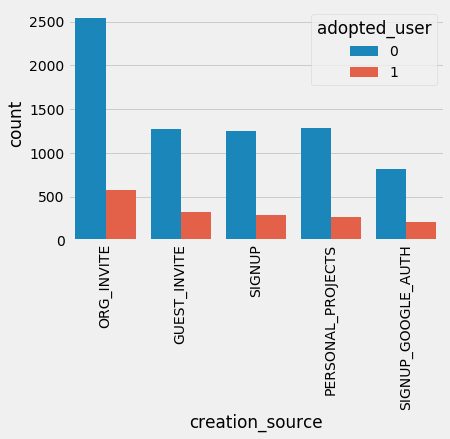

In [160]:
sns.countplot(x='creation_source', hue='adopted_user', data=data)
plt.xticks(rotation=90)

it seems that creation source is not making a significant diffrence in terms of user retention . We can also look at the percentage of adopted users for each source.

In [161]:
data.groupby('creation_source')['adopted_user'].apply(lambda x: sum(x)/len(x))

creation_source
GUEST_INVITE          0.200501
ORG_INVITE            0.184734
PERSONAL_PROJECTS     0.170763
SIGNUP                0.188630
SIGNUP_GOOGLE_AUTH    0.201183
Name: adopted_user, dtype: float64

based on the percentages above, we see that guest invite and personal projects are more effective on adopted users 


In [165]:
data.groupby('enabled_for_marketing_drip')['adopted_user'].apply(lambda x: sum(x)/len(x))

enabled_for_marketing_drip
0    0.184658
1    0.205385
Name: adopted_user, dtype: float64

There is not significant difference between those who signed up for marketing drip and those who did not sign up


In [162]:
# Perform Chi-square independence test 
from scipy.stats import chi2_contingency
table=pd.crosstab(data.creation_source, data.adopted_user)
test=chi2_contingency(table)
print('Test Statistic = {}, p-value= {}'.format(test[0], test[1]))

Test Statistic = 6.0214840989026275, p-value= 0.19754956274544602


the test suggests that creation source and adopted user rate are not independent. 

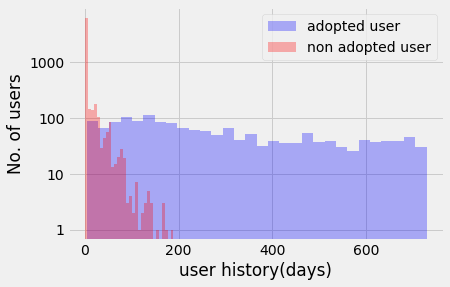

In [194]:
def plot_hist_days(df, col, xlabel):
    _ = plt.hist(df.loc[data['adopted_user']==1, col], 
                 bins=30, alpha=0.3, color='b', label='adopted user')
    _ = plt.hist(df.loc[data['adopted_user']==0, col], 
                 bins=30, alpha=0.3, color='r', label='non adopted user')
    _ = plt.yscale('log')
    _ = plt.legend()
    _ = plt.xlabel(xlabel)
    _ = plt.ylabel('No. of users')
    _ = plt.yticks([1, 10, 100, 1000], ['1', '10', '100', '1000'])
plot_hist_days(data, 'history', 'user history(days)')

Based on the graph above, we see that history has a significant effect on adopted user rate.

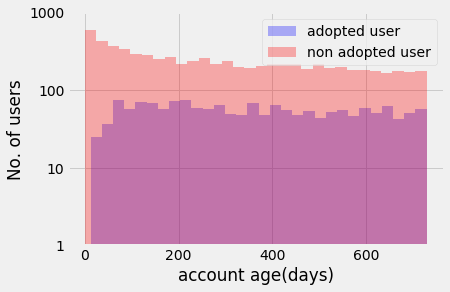

In [125]:
plot_hist_days(data, 'age', 'account age(days)')

Adopted user rate does not really change over time. 

# Modelling 

In [166]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score


# Preprocessing Data

In [195]:

creation_source = pd.get_dummies(data['creation_source'], drop_first=True)
model_data = pd.concat([data, creation_source], axis=1).drop('creation_source', axis=1)
y = model_data['adopted_user']
X = model_data.drop('adopted_user', axis=1)
Xtrain, Xtest, ytrain, ytest = train_test_split(
    X, y, stratify=y, random_state=42)

In [196]:
clf = RandomForestClassifier(random_state=42, class_weight='balanced')
# use CV to tune number of trees
params = {'n_estimators': [10, 50, 100, 200]}
model = GridSearchCV(clf, params)
model.fit(Xtrain, ytrain)
print('Best parameters were', model.best_params_)
print('Best average precision was', model.best_score_)

C:\Users\turki\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Best parameters were {'n_estimators': 100}
Best average precision was 0.9613117727066647


In [197]:
#evaluation of the model 
model = RandomForestClassifier(
    random_state=42, class_weight='balanced', n_estimators=100
)
model.fit(Xtrain, ytrain)
ypred = model.predict(Xtest)
print('Accuracy of test set was', accuracy_score(ytest, ypred))
print(classification_report(ytest, ypred))

Accuracy of test set was 0.9519492293744334
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1792
           1       0.88      0.86      0.87       414

    accuracy                           0.95      2206
   macro avg       0.92      0.92      0.92      2206
weighted avg       0.95      0.95      0.95      2206



In [198]:
# take a look at feature importance
imp = pd.Series(model.feature_importances_, index=X.columns)
imp = imp.sort_values(ascending=False)
print(imp)

history                       0.896083
account_age                   0.088952
opted_in_to_mailing_list      0.002999
SIGNUP                        0.002915
enabled_for_marketing_drip    0.002702
ORG_INVITE                    0.002362
PERSONAL_PROJECTS             0.002070
SIGNUP_GOOGLE_AUTH            0.001917
dtype: float64


# Recommendation 

1. History is the most important model according the results. Therefore, the company should encourage the users the be more active after they created the account. 

2. People should also be incentivized to invite other people. Personal projects are also effective for user adoption. Thus, people should be encouraged to work on their personal projects.


